# Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
filename = 'titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Goal is to provide data on survival rate, will drop irrelevant columns

In [3]:
df.shape

(891, 12)

In [4]:
df = df.drop(columns=['PassengerId','Cabin'])

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Correlation heatmap before we switch survived to categorical heatmap

<AxesSubplot:>

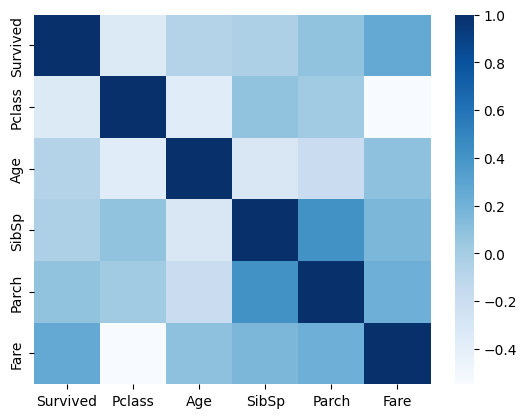

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

In [7]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [8]:
df['Survived'].astype(object, copy=False)
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [9]:
df['Survived'] = df['Survived'].replace(0, 'False')
df['Survived'] = df['Survived'].replace(1, 'True')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [11]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df = df.dropna(subset=['Embarked'])
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [13]:
df.dtypes

Survived     object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

## Data exploration
Looking at a few data categories

In [14]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  True        231
        False        81
male    False       468
        True        109
Name: Survived, dtype: int64

In [15]:
df.groupby('Survived')['Fare'].mean()

Survived
False    22.117887
True     48.209498
Name: Fare, dtype: float64

In [16]:
df.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
False     S           427
          C            75
          Q            47
True      S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

## Data Viz

<AxesSubplot:xlabel='Survived', ylabel='count'>

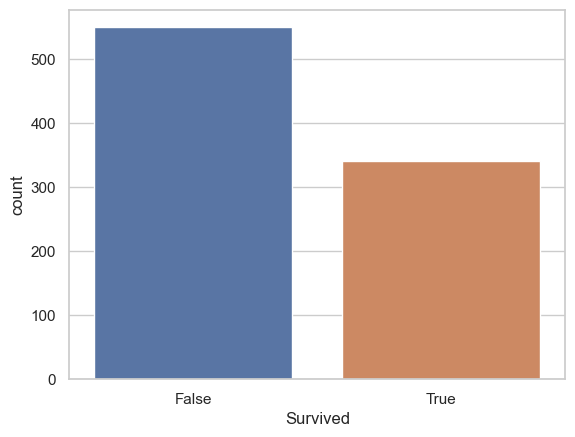

In [17]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

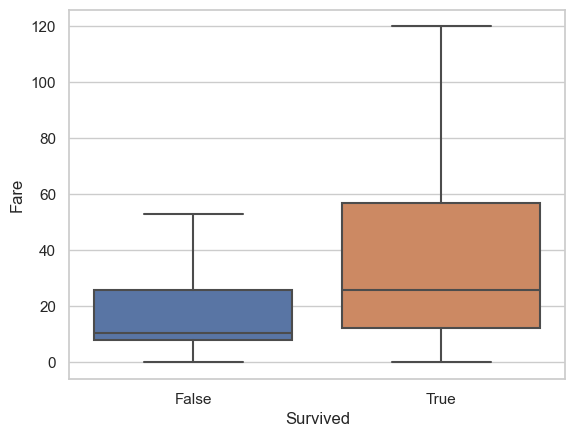

In [18]:
sns.boxplot(x='Survived', y='Fare', data=df, showfliers = False) #An outlier is making this hard to see, I'm going to remove them

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

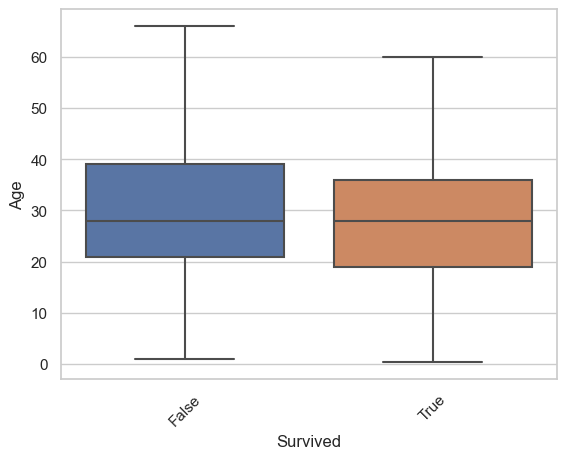

In [19]:
sns.boxplot(x='Survived', y='Age', data=df, showfliers = False)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

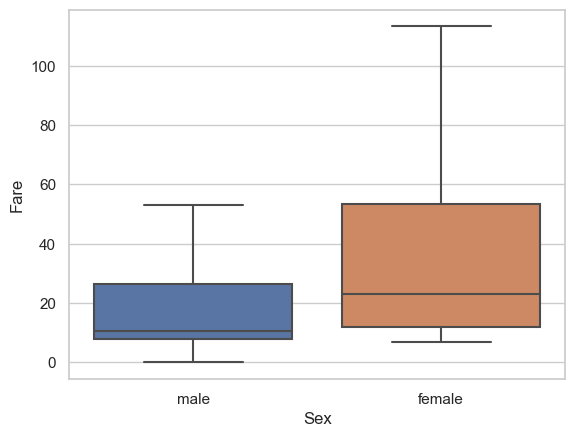

In [20]:
sns.boxplot(x='Sex', y='Fare', data=df, showfliers = False) 

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

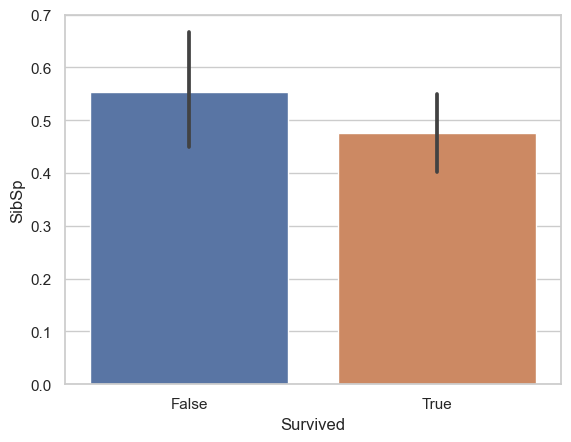

In [21]:
sns.barplot(x='Survived', y='SibSp', data=df) 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

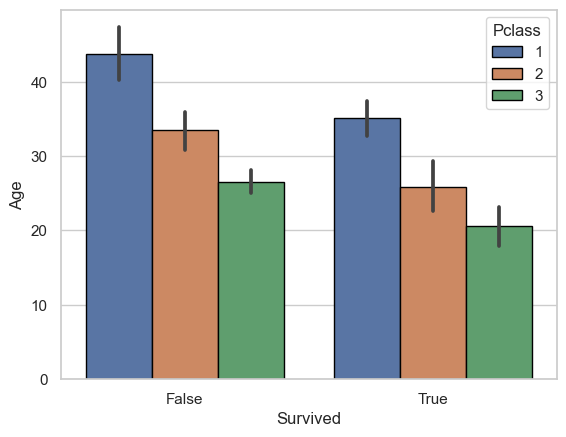

In [22]:
sns.barplot(data = df, x = 'Survived', y = 'Age', hue = 'Pclass', edgecolor='black')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

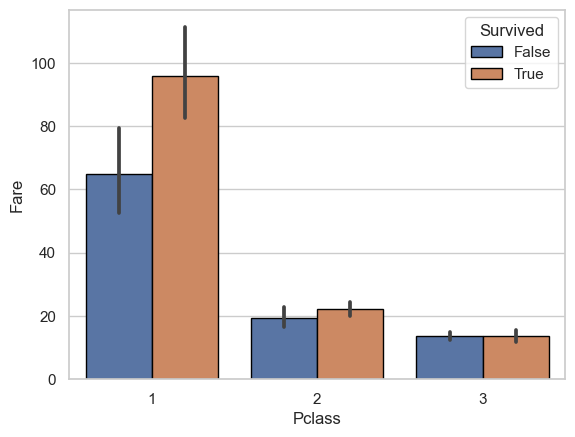

In [23]:
sns.barplot(data = df, x = 'Pclass', y = 'Fare', hue = 'Survived', edgecolor='black', )

<AxesSubplot:xlabel='Age', ylabel='Fare'>

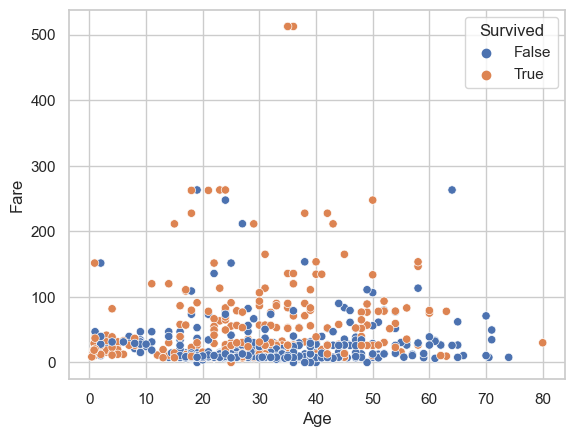

In [24]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')

C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Test\anaconda3\envs\dojo-env\lib\site-packa

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

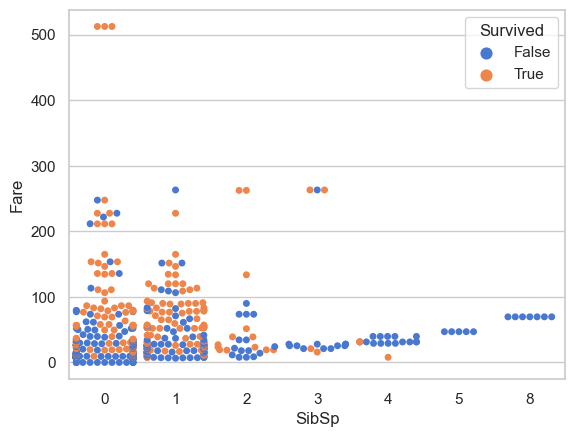

In [25]:
sns.swarmplot(data=df, x='SibSp', y='Fare', hue='Survived', palette='muted')

Data viz is done, will make pipelines and models

Saving df to its own file

In [26]:
df.to_csv(f"updated.csv", index=False)